In [5]:
import re
import json
import uuid
import glob
import pickle
import sys
import os
import math
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.cluster import KMeansClusterer, euclidean_distance
from numpy import array
from pprint import pprint
import re
import scipy.stats as stat
from os.path import basename
import string
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import operator
from nltk import stem
from nltk.stem.snowball import *
from nltk.stem import PorterStemmer
import datetime
import time
from pprint import pprint
from gensim.corpora.dictionary import Dictionary

%matplotlib inline
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import os

# Enable logging for gensim - optional
import logging
logging.basicConfig(filename='lda_model_Mommit.log',format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")


def Tokinization(document):
    document = "".join(document)
    tokenizer = RegexpTokenizer(r'\w+')
    intermediate = tokenizer.tokenize(document)
    return intermediate


In [2]:
df= pd.read_pickle('Parenting_cleaned.pkl')

In [3]:
#Creating a Mommit Data Frame
Mommit = df[df['subreddit']=='Mommit']

In [4]:
print('reading the Mommit Cleaned dataframe...')
print('*' * 50)
print('and for a test...')
print(Mommit.clean_body.head())
print('*' * 50)

reading the Mommit Cleaned dataframe...
**************************************************
and for a test...
1038051                                                 love
1038053                                                 weed
1038054    use money buy babi gift basket call stork bask...
1038057    throw plan go sure could get pregnant first mo...
1038058    go start tri get pregnant month someth beyond ...
Name: clean_body, dtype: object
**************************************************


In [5]:
print('grouping into dcouments')
CompleteThread = []
CompleteThread = Mommit.groupby('link_id')['clean_body'].apply(list)
#running for the rest of the data
processed_threads = []
#creating threads for each of the users
for thread in CompleteThread:
    #Preprocessing each of the threads
    processed_threads.append(Tokinization(thread))

grouping into dcouments


In [6]:
texts = processed_threads
print('The length of the documents is...')
print(len(texts))
print('*' * 50)
print('the first document is...')
print(texts[0])
print('*' * 50)

print('buiding the dictionary...')
dictionary = corpora.Dictionary(texts)
dictionary.save('MommitDictionary.dict')
print(dictionary[0])

print('building the corpus')
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('MommitCorpusFinal.mm', corpus)
print(corpus[0])

The length of the documents is...
17399
**************************************************
the first document is...
['childless', 'choic', 'year', 'still', 'especi', 'fond', 'peopl', 'kid', 'kind', 'hard', 'like', 'believ', 'readi', 'tri', 'child', 'eight', 'year', 'fantast', 'support', 'partner', 'knew', 'would', 'great', 'dad', 'want', 'kid', 'badli', 'never', 'heartbroken', 'feel', 'readi', 'mom', 'daughter', 'decis', 'made', 'lightli', 'scare', 'throughout', 'entir', 'pregnanc', 'would', 'aw', 'parent', 'mess', 'littl', 'three', 'seem', 'pretti', 'wellmet', 'husband', 'bare', 'went', 'whirlwind', 'romanc', 'involv', 'lot', 'sex', 'never', 'care', 'thank', 'pass', 'std', 'hiv', 'test', 'told', 'kid', 'born', 'hypospadia', 'googl', 'risk', 'pco', 'know', 'time', 'continu', 'use', 'protect', 'total', 'four', 'year', 'went', 'diet', 'exercis', 'regim', 'lost', 'pound', 'start', 'ovul', 'boom', 'got', 'pregnant', 'unexpectedli', 'alway', 'said', 'okay', 'never', 'kid', 'thought', 'secre

limit_output extension: Maximum message size of 10000 exceeded with 11602 characters

In [7]:
print('reading all LDA models....')
print('*' * 50)

model_list =  []

coherence_values = []

for i in range(0, len(model_list)):
    print('now working on coherence value for model...')
    print(model_list[i])
    print('*' * 50)
    coherencemodel = CoherenceModel(model=model_list[i], texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

reading all LDA models....
**************************************************


In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [9]:
from gensim.models import LdaModel
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=10, limit=100, step=10)

/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/tammari/Desktop/DaskTest/env/lib/python3.6/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [10]:
limit = 100
start = 10
step  = 10    

x = range(start, limit, step)
coherence = zip(x, coherence_values)
sorted_coherence = sorted(coherence, key=lambda x: x[1], reverse=True)

print(sorted_coherence)
print('*' * 50)

for m, cv in sorted_coherence:
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
print('saving list...')
print('*' * 50)
with open("Mommit_cohere.pkl", "wb") as fp: 
    pickle.dump(sorted_coherence, fp)
    
print('creating a graph of the coherence model...')
print('*' * 50)

# Show graph
fig = plt.gcf()
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
fig.savefig('Mommit_LDA_models_coherence.png')

[(50, 0.3723073201834858), (60, 0.3584696938337278), (80, 0.35344258290129604), (30, 0.3527240830563468), (70, 0.3451880728465597), (90, 0.3434842602732379), (40, 0.3371560677325858), (20, 0.3279863377063672), (10, 0.29906741373226675)]
**************************************************
Num Topics = 50  has Coherence Value of 0.3723
Num Topics = 60  has Coherence Value of 0.3585
Num Topics = 80  has Coherence Value of 0.3534
Num Topics = 30  has Coherence Value of 0.3527
Num Topics = 70  has Coherence Value of 0.3452
Num Topics = 90  has Coherence Value of 0.3435
Num Topics = 40  has Coherence Value of 0.3372
Num Topics = 20  has Coherence Value of 0.328
Num Topics = 10  has Coherence Value of 0.2991
saving list...
**************************************************
creating a graph of the coherence model...
**************************************************


In [11]:
for i in range(0,len(model_list)):
    model_list[i].save('Mommit_Model'+str(i)+".model")

In [9]:
limit = 100
start = 10
step  = 10  

with open('Mommit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)
    
#x = range(start, limit, step)
coherence = zip(x, coherence_values)
sorted_coherence = sorted(coherence, key=lambda x: x[1], reverse=True)

fig = plt.gcf()
limit=limit; start=start; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
fig.savefig('Mommit_LDA_models_coherence_new.png')

In [11]:
with open('Mommit_cohere.pkl', 'rb') as f:
    coherence_values = pickle.load(f)

In [21]:
df = pd.DataFrame.from_records(coherence_values, columns =['Topics', 'Coherence']) 

In [40]:
df = df.sort_values(by='Topics')

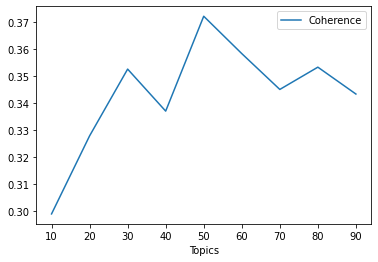

In [41]:
df.plot(x ='Topics', y='Coherence', kind = 'line')
plt.show()

# Finding topic distributions accross df

In [ ]:
#First, get a list of posts, one by one
processed_posts = []
CompletePosts = df['clean_body'].apply(list)
#running for the rest of the data
processed_posts = []
#creating threads for each of the users
for post in CompletePosts:
    #Preprocessing each of the threads
    processed_posts.append(Tokinization(post))
       
new_doc2bow = [dictionary.doc2bow(post) for post in processed_posts]

vector = optimal_model.get_document_topics(new_doc2bow)

#create a list of dictioaries for scores relating to optimum LDA
newdictlist = []
for i in range(0, len(vector)):
    newdictlist.append(dict(vector[i]))

topic_bow = pd.DataFrame(newdictlist)

topic_bow.fillna(0, inplace=True)

topic_bow

RedditComplete = df.copy()

#create list of topic names to be 
#columns for the new df
TopicList = []
TopicNum = optimal_model.num_topics

for i in range(0,TopicNum):
    TopicList.append('Topic_' + str(i))

columns = TopicList
column_indices = topic_bow.columns
new_names = columns
old_names = topic_bow[column_indices]
topic_bow.rename(columns=dict(zip(old_names, new_names)), inplace=True)

#leave in place and add the columns together
RedditComplete.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
MizoFrame = pd.concat([RedditComplete, topic_bow], axis=1)

MizoFrame.head()

# Recognizing different topics

#set the nuber of samples you want and how close they are to 
#a specific topic
Sample_Size = 50
Percentage_Closeness = 0.90
#if there are no reddit posts with 90% closeness
Secondary_Closeness = 0.5 

#create a number of empty strings equal to the number of topics in the optimum LDA model
TopicSamples = [[] for i in range(TopicNum)]

#Checking on the numeber of lists
len(TopicSamples)

optimal_model.print_topics(num_words=40)

#Get 100 random samples for each of the topics in order to understand what each is about
for i in range(0, len(TopicSamples)):
    try:
        TopicSamples[i] = MizoFrame[MizoFrame[TopicList[i]]>Percentage_Closeness].body.sample(100, replace=True)
    except:
    #could be that there are no posts with 90% closeness    
        TopicSamples[i] = MizoFrame[MizoFrame[TopicList[i]]>Secondary_Closeness].body.sample(100, replace=True)

TopicSamples[32]

In [2]:
topic_bow

NameError: name 'topic_bow' is not defined

In [ ]:
MizoFrame.to_pickle('LDA_40_Topics.pkl')
print('saving 40 LDA topics...')
with open("TopicSamples.pkl", "wb") as fp: 
    pickle.dump(TopicSamples, fp)

with open("TopicSamples_40_topics.pkl", "wb") as fp: 
    pickle.dump(TopicSamples, fp)

new_topic_name = []

#create list of new names
#for each of the topics after
#reading the comments
new_topic_name.append('AA_Skills')

#creating the new names for the 
#topics, from Topic_N to names
#Create a new Pandas dataframe at the end
column_indices = topic_bow.columns
new_names = new_topic_name
old_names = topic_bow[column_indices]
topic_bow.rename(columns=dict(zip(old_names, new_names)), inplace=True)

topic_bow

#leave in place and add the columns together
RedditComplete.reset_index(drop=True, inplace=True)
topic_bow.reset_index(drop=True, inplace=True)
MizoFrameTopic = pd.concat([RedditComplete, topic_bow], axis=1)

MizoFrameTopic.head()

In [ ]:
import pandas as pd
pd.options.display.max_rows = 100
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
@interact
def show_commands_high_density(topic=''):
    return Commands[Commands.command.str.contains(word1) & Commands.command.str.contains(word2) & Commands.command.str.contains(word3)].command